In [191]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(spark.sparkContext, 'eb105b10-e827-4da4-879e-cda45b4d0e49', 'p-8b51b542eb92c4dae8f8d225922c4ee2e512b165')
pc = project.project_context


In [192]:
print('Project Name: {0}'.format(project.get_name()))
print('Project Description: {0}'.format(project.get_description()))
print('Project Bucket Name: {0}'.format(project.get_project_bucket_name()))
print('Project Assets (Connections): {0}'.format(project.get_assets(asset_type='connection')))

Project Name: BDPP_Project
Project Description: This is the final project, for the demo
Project Bucket Name: bdppproject-donotdelete-pr-bibcnvcar6fhub
Project Assets (Connections): []


In [193]:

import ibmos2spark
# @hidden_cell
credentials = {
    'endpoint': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'service_id': 'iam-ServiceId-aaf06632-a925-4f1b-a1ad-4eb3f5182d4c',
    'iam_service_endpoint': 'https://iam.cloud.ibm.com/oidc/token',
    'api_key': 'cfdE0b2otcqGpFI7mW6b1nD_tZKjR9z-zqgROrxPmu2a'
}

configuration_name = 'os_4fe49bf4d14c41f9a72c9ef73f278c1a_configs'
cos = ibmos2spark.CloudObjectStorage(sc, credentials, configuration_name, 'bluemix_cos')

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
heart_stroke_train = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .load(cos.url('train_2v.csv', 'bdppproject-donotdelete-pr-bibcnvcar6fhub'))
heart_stroke_train.take(5)


[Row(id='30669', gender='Male', age='3', hypertension='0', heart_disease='0', ever_married='No', work_type='children', Residence_type='Rural', avg_glucose_level='95.12', bmi='18', smoking_status=None, stroke='0'),
 Row(id='30468', gender='Male', age='58', hypertension='1', heart_disease='0', ever_married='Yes', work_type='Private', Residence_type='Urban', avg_glucose_level='87.96', bmi='39.2', smoking_status='never smoked', stroke='0'),
 Row(id='16523', gender='Female', age='8', hypertension='0', heart_disease='0', ever_married='No', work_type='Private', Residence_type='Urban', avg_glucose_level='110.89', bmi='17.6', smoking_status=None, stroke='0'),
 Row(id='56543', gender='Female', age='70', hypertension='0', heart_disease='0', ever_married='Yes', work_type='Private', Residence_type='Rural', avg_glucose_level='69.04', bmi='35.9', smoking_status='formerly smoked', stroke='0'),
 Row(id='46136', gender='Male', age='14', hypertension='0', heart_disease='0', ever_married='No', work_type='

In [194]:

testSet = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .load(cos.url('test_2v.csv', 'bdppproject-donotdelete-pr-bibcnvcar6fhub'))
testSet.take(5)


[Row(id='36306', gender='Male', age='80', hypertension='0', heart_disease='0', ever_married='Yes', work_type='Private', Residence_type='Urban', avg_glucose_level='83.84', bmi='21.1', smoking_status='formerly smoked'),
 Row(id='61829', gender='Female', age='74', hypertension='0', heart_disease='1', ever_married='Yes', work_type='Self-employed', Residence_type='Rural', avg_glucose_level='179.5', bmi='26', smoking_status='formerly smoked'),
 Row(id='14152', gender='Female', age='14', hypertension='0', heart_disease='0', ever_married='No', work_type='children', Residence_type='Rural', avg_glucose_level='95.16', bmi='21.2', smoking_status=None),
 Row(id='12997', gender='Male', age='28', hypertension='0', heart_disease='0', ever_married='No', work_type='Private', Residence_type='Urban', avg_glucose_level='94.76', bmi='23.4', smoking_status=None),
 Row(id='40801', gender='Female', age='63', hypertension='0', heart_disease='0', ever_married='Yes', work_type='Govt_job', Residence_type='Rural', 

In [195]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics
class CurveMetrics(BinaryClassificationMetrics):
    def __init__(self, *args):
        super(CurveMetrics, self).__init__(*args)

    def _to_list(self, rdd):
        points = []
        
        for row in rdd.collect():
            
            points += [(float(row._1()), float(row._2()))]
        return points

    def get_curve(self, method):
        rdd = getattr(self._java_model, method)().toJavaRDD()
        return self._to_list(rdd)

In [196]:
heart_stroke_train.printSchema()

root
 |-- id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: string (nullable = true)
 |-- hypertension: string (nullable = true)
 |-- heart_disease: string (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: string (nullable = true)
 |-- bmi: string (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: string (nullable = true)



In [197]:
heart_stroke_train.dtypes

[('id', 'string'),
 ('gender', 'string'),
 ('age', 'string'),
 ('hypertension', 'string'),
 ('heart_disease', 'string'),
 ('ever_married', 'string'),
 ('work_type', 'string'),
 ('Residence_type', 'string'),
 ('avg_glucose_level', 'string'),
 ('bmi', 'string'),
 ('smoking_status', 'string'),
 ('stroke', 'string')]

In [198]:
heart_stroke_train.toPandas().head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3,0,0,No,children,Rural,95.12,18,None,0
1,30468,Male,58,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8,0,0,No,Private,Urban,110.89,17.6,None,0
3,56543,Female,70,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14,0,0,No,Never_worked,Rural,161.28,19.1,None,0


In [199]:
heart_stroke_train=heart_stroke_train.withColumnRenamed("stroke","label")

In [200]:
heart_stroke_train.printSchema()

root
 |-- id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: string (nullable = true)
 |-- hypertension: string (nullable = true)
 |-- heart_disease: string (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: string (nullable = true)
 |-- bmi: string (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- label: string (nullable = true)



In [201]:
from pyspark.sql.types import DoubleType
from pyspark.sql.types import IntegerType
heart_stroke_train = heart_stroke_train.withColumn("id", heart_stroke_train["id"].cast(IntegerType()))
heart_stroke_train=heart_stroke_train.withColumn("age",heart_stroke_train["age"].cast(DoubleType()))
heart_stroke_train = heart_stroke_train.withColumn("hypertension", heart_stroke_train["hypertension"].cast(IntegerType()))
heart_stroke_train = heart_stroke_train.withColumn("heart_disease", heart_stroke_train["heart_disease"].cast(IntegerType()))
heart_stroke_train=heart_stroke_train.withColumn("avg_glucose_level",heart_stroke_train["avg_glucose_level"].cast(DoubleType()))
heart_stroke_train=heart_stroke_train.withColumn("bmi",heart_stroke_train["bmi"].cast(DoubleType()))
heart_stroke_train = heart_stroke_train.withColumn("label", heart_stroke_train["label"].cast(IntegerType()))

In [202]:
testSet.printSchema()

root
 |-- id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: string (nullable = true)
 |-- hypertension: string (nullable = true)
 |-- heart_disease: string (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: string (nullable = true)
 |-- bmi: string (nullable = true)
 |-- smoking_status: string (nullable = true)



In [203]:
testSet = testSet.withColumn("id", testSet["id"].cast(IntegerType()))
testSet = testSet.withColumn("age",testSet["age"].cast(DoubleType()))
testSet = testSet.withColumn("hypertension", testSet["hypertension"].cast(IntegerType()))
testSet = testSet.withColumn("heart_disease", testSet["heart_disease"].cast(IntegerType()))
testSet = testSet.withColumn("avg_glucose_level",testSet["avg_glucose_level"].cast(DoubleType()))
testSet = testSet.withColumn("bmi",testSet["bmi"].cast(DoubleType()))

In [204]:
testSet.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)



In [205]:
heart_stroke_train.count(),len(heart_stroke_train.columns)

(43400, 12)

In [206]:
testSet.count(),len(testSet.columns)

(18601, 11)

In [207]:
heart_stroke_train.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+-----+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|label|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+-----+
|30669|  Male| 3.0|           0|            0|          No|     children|         Rural|            95.12|18.0|           null|    0|
|30468|  Male|58.0|           1|            0|         Yes|      Private|         Urban|            87.96|39.2|   never smoked|    0|
|16523|Female| 8.0|           0|            0|          No|      Private|         Urban|           110.89|17.6|           null|    0|
|56543|Female|70.0|           0|            0|         Yes|      Private|         Rural|            69.04|35.9|formerly smoked|    0|
|46136|  Male|14.0|           0|            0|          No| Ne

In [208]:
testSet.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+
|36306|  Male|80.0|           0|            0|         Yes|      Private|         Urban|            83.84|21.1|formerly smoked|
|61829|Female|74.0|           0|            1|         Yes|Self-employed|         Rural|            179.5|26.0|formerly smoked|
|14152|Female|14.0|           0|            0|          No|     children|         Rural|            95.16|21.2|           null|
|12997|  Male|28.0|           0|            0|          No|      Private|         Urban|            94.76|23.4|           null|
|40801|Female|63.0|           0|            0|         Yes|     Govt_job|         Rural|            83.5

+-----+-----+
|label|count|
+-----+-----+
|    1|  783|
|    0|42617|
+-----+-----+



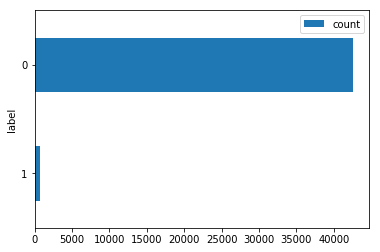

In [209]:
heart_stroke_train.groupBy('label').count().show()
df_heart=heart_stroke_train.groupBy('label').count().toPandas()
df_heart.plot(x='label',y='count',kind='barh')

# Handling the Imbalanced dataset

As we can see that there are more records with label '0' and very few compared to label '1' class. This should be fixed before proceeding forward

In [210]:
heart_stroke_train_pos=heart_stroke_train.filter(heart_stroke_train["label"]==1)
heart_stroke_train_neg=heart_stroke_train.filter(heart_stroke_train["label"]==0)

In [211]:
from pyspark.sql.functions import col
heart_stroke_train_pos= heart_stroke_train_pos.where(col('label')==1).sample(True,(42617/783)*3.0, seed = 2018)
heart_stroke_train_neg=heart_stroke_train_neg.where(col('label')==0)
heart_stroke_train = heart_stroke_train_neg.union(heart_stroke_train_pos)

In [212]:
heart_stroke_train_neg=heart_stroke_train_neg.where(col('label')==0).sample(True, 3.0, seed = 2018)
heart_stroke_train = heart_stroke_train_neg.union(heart_stroke_train_pos)

+-----+------+
|label| count|
+-----+------+
|    1|128078|
|    0|128061|
+-----+------+



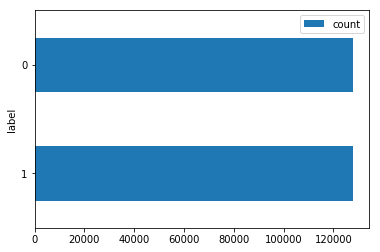

In [213]:
heart_stroke_train.groupBy('label').count().show()
df_heart=heart_stroke_train.groupBy('label').count().toPandas()
df_heart.plot(x='label',y='count',kind='barh')

In [214]:
heart_stroke_train.createOrReplaceTempView('heart')
testSet.createOrReplaceTempView('test')

+-------------+-----+
|    work_type|count|
+-------------+-----+
|      Private|72171|
|Self-employed|40901|
|     Govt_job|14695|
|     children|  311|
+-------------+-----+



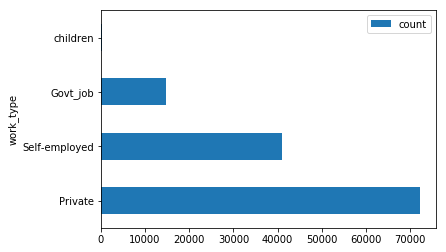

In [215]:
heart_stroke_train.filter(heart_stroke_train['label']==1).groupBy('work_type').count().orderBy('count',ascending=False).show()
heart_stroke_train_plot=heart_stroke_train.filter(heart_stroke_train['label']==1).groupBy('work_type').count().orderBy('count',ascending=False)
data=heart_stroke_train_plot.toPandas()
data.plot(x='work_type',y='count',kind='barh')

+---------------+-----+
| smoking_status|count|
+---------------+-----+
|   never smoked|46593|
|formerly smoked|35945|
|           null|23628|
|         smokes|21912|
+---------------+-----+



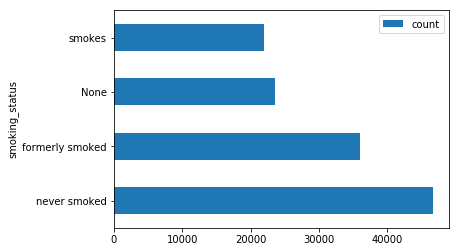

In [216]:
heart_stroke_train.filter(heart_stroke_train['label']==1).groupBy('smoking_status').count().orderBy('count',ascending=False).show()
smoking_status_plot=heart_stroke_train.filter(heart_stroke_train['label']==1).groupBy('smoking_status').count().orderBy('count',ascending=False)
data=smoking_status_plot.toPandas()
data.plot(x='smoking_status',y='count',kind='barh')

Since we can see that we have the 'null' value in the smoke type. It will be better to replace it another parameter called 'No Info' as it will look cleaner

In [217]:
updated_info=heart_stroke_train.fillna('No Info',subset=['smoking_status'])
updated_info.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+-----+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|label|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+-----+
|30669|  Male| 3.0|           0|            0|          No|     children|         Rural|            95.12|18.0|        No Info|    0|
|30468|  Male|58.0|           1|            0|         Yes|      Private|         Urban|            87.96|39.2|   never smoked|    0|
|30468|  Male|58.0|           1|            0|         Yes|      Private|         Urban|            87.96|39.2|   never smoked|    0|
|16523|Female| 8.0|           0|            0|          No|      Private|         Urban|           110.89|17.6|        No Info|    0|
|16523|Female| 8.0|           0|            0|          No|   

In [218]:
testSet=testSet.fillna('No Info',subset=['smoking_status'])
testSet.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+
|36306|  Male|80.0|           0|            0|         Yes|      Private|         Urban|            83.84|21.1|formerly smoked|
|61829|Female|74.0|           0|            1|         Yes|Self-employed|         Rural|            179.5|26.0|formerly smoked|
|14152|Female|14.0|           0|            0|          No|     children|         Rural|            95.16|21.2|        No Info|
|12997|  Male|28.0|           0|            0|          No|      Private|         Urban|            94.76|23.4|        No Info|
|40801|Female|63.0|           0|            0|         Yes|     Govt_job|         Rural|            83.5

We can now see that we null value in the smoking_status column has been replaced with No Info.

+---------------+-----+
| smoking_status|count|
+---------------+-----+
|   never smoked|46593|
|formerly smoked|35945|
|        No Info|23628|
|         smokes|21912|
+---------------+-----+



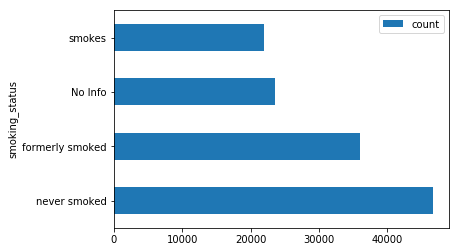

In [219]:
smoking_status_plot=updated_info.filter(updated_info['label']==1).groupBy('smoking_status').count().orderBy('count',ascending=False)
updated_info.filter(updated_info['label']==1).groupBy('smoking_status').count().orderBy('count',ascending=False).show()
data=smoking_status_plot.toPandas()
data.plot(x='smoking_status',y='count',kind='barh')

+----+-----+
| age|count|
+----+-----+
|82.0| 5829|
|81.0| 7166|
|80.0| 7986|
|79.0|11350|
|78.0| 9512|
|77.0| 4018|
|76.0| 3865|
|75.0| 3715|
|74.0| 3930|
|73.0| 2418|
|72.0| 3442|
|71.0| 3167|
|70.0| 4078|
|69.0| 3266|
|68.0| 3405|
|67.0| 3753|
|66.0| 2733|
|65.0| 2989|
|64.0| 1356|
|63.0| 2947|
+----+-----+
only showing top 20 rows



<Figure size 2160x1440 with 0 Axes>

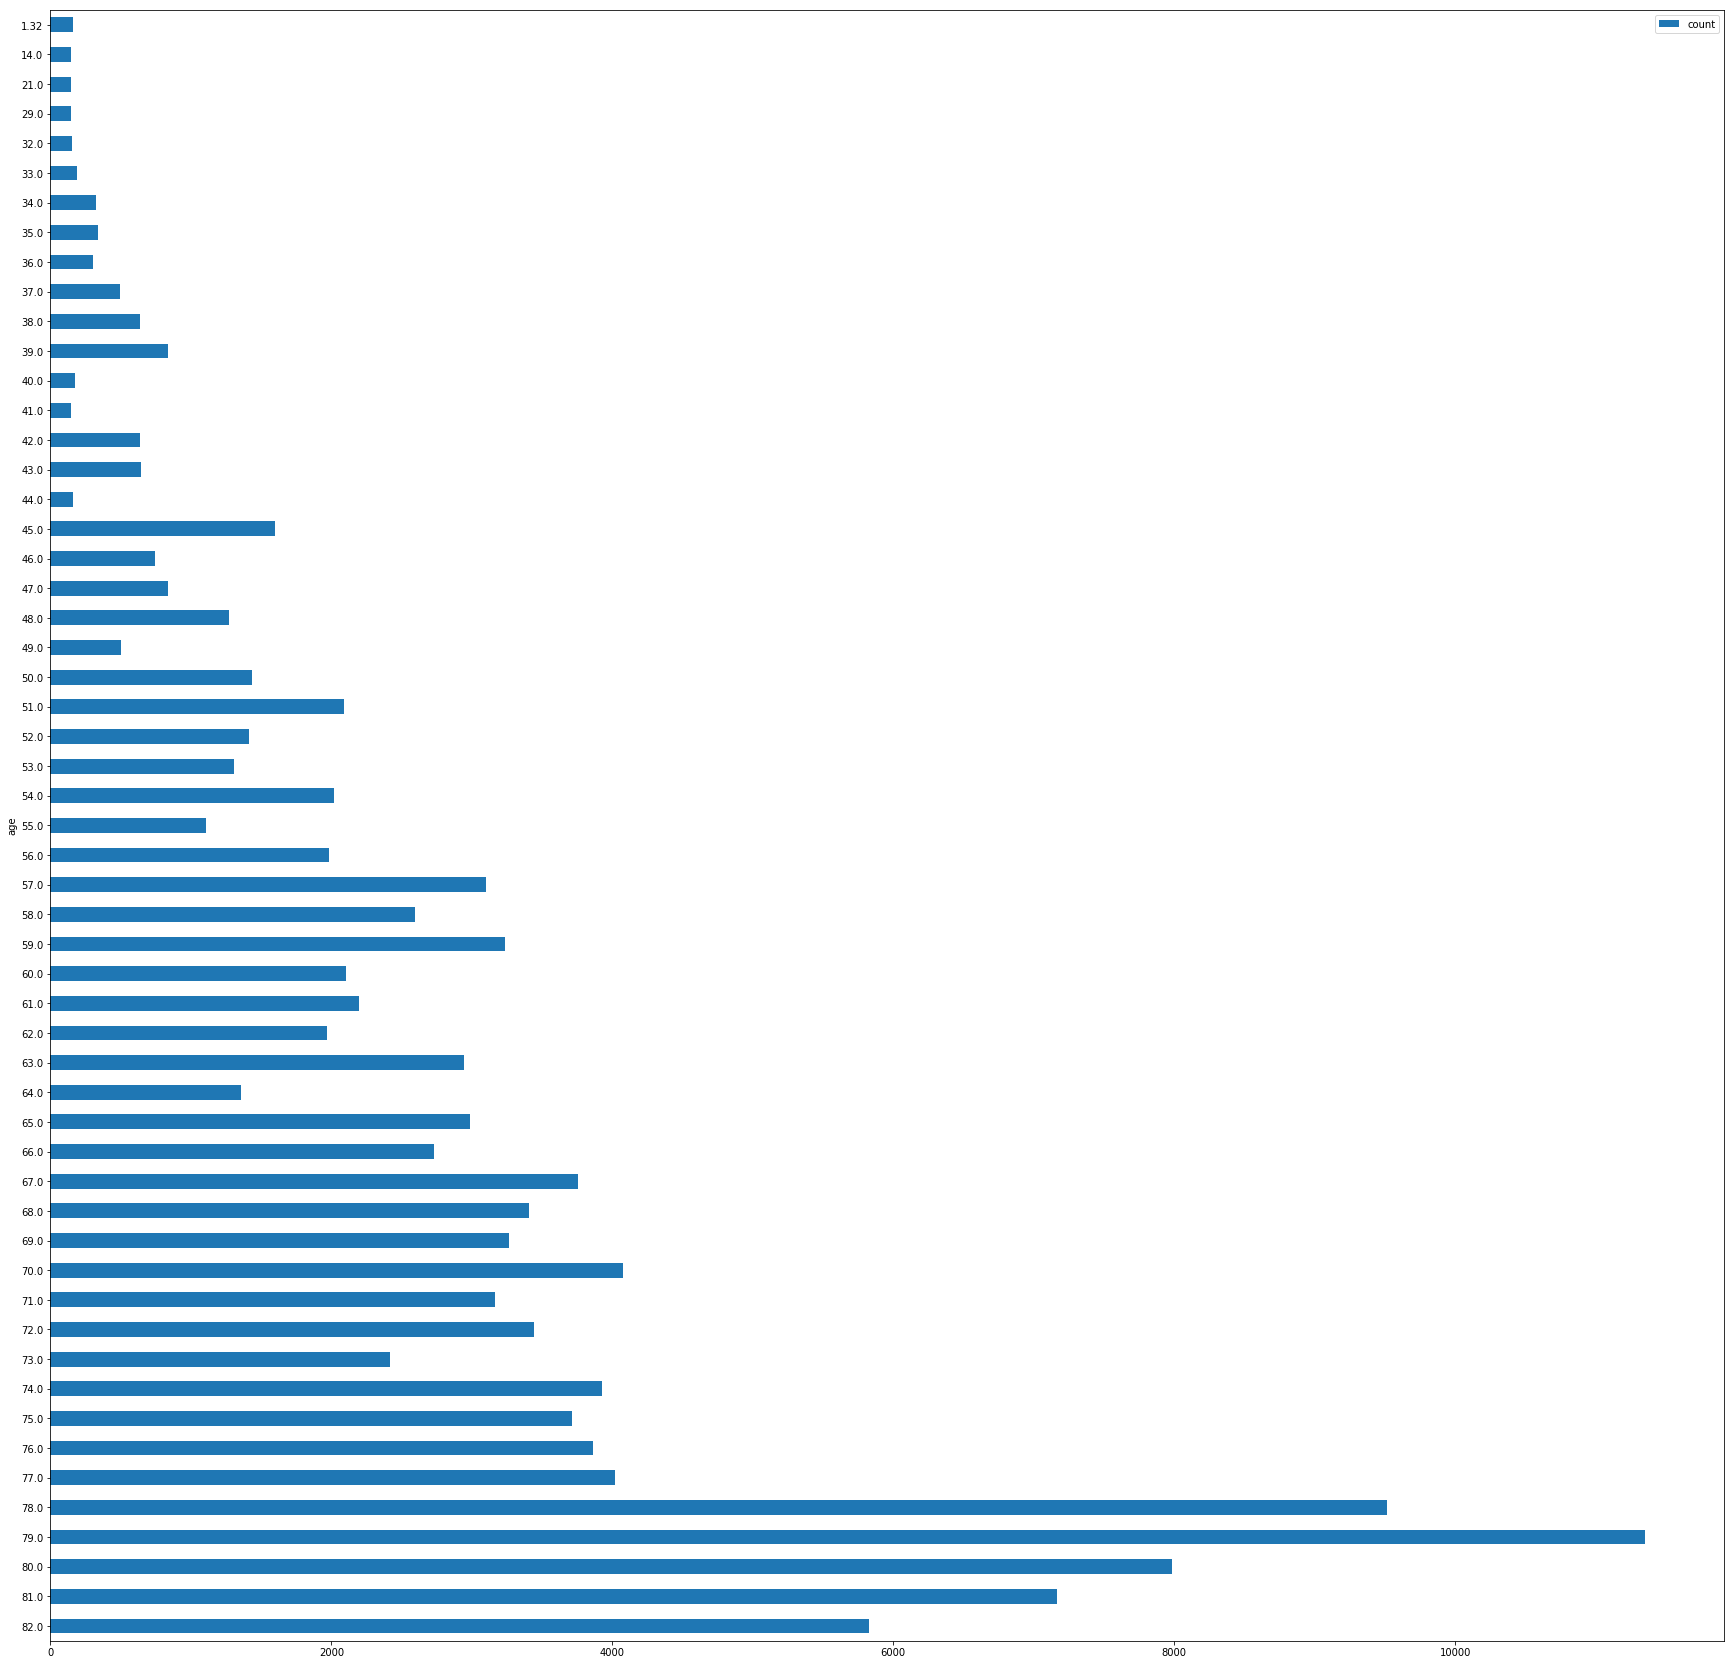

In [220]:
import matplotlib.pyplot as plt
%matplotlib inline
updated_info.filter(updated_info['label']==1).groupBy('age').count().orderBy('age',ascending=False).show()
plt.figure(figsize=(30, 20))
#sns.barplot(x='age',y='count',data=updated_info.filter(updated_info['stroke']==1).groupBy('age').count().orderBy('age',ascending=False).toPandas())
data=updated_info.filter(updated_info['label']==1).groupBy('age').count().orderBy('age',ascending=False).toPandas()
data.plot(x='age',y='count',kind='barh',figsize=(30, 30))

In [221]:
updated_info.filter(updated_info['label']==1).select('bmi').distinct().show()

+----+
| bmi|
+----+
|26.7|
|47.5|
|15.4|
|37.1|
|25.1|
|32.3|
|24.7|
|50.9|
|44.8|
|26.4|
|46.4|
|23.8|
|24.9|
|37.4|
|31.7|
|35.6|
|36.2|
|31.1|
|26.6|
|23.9|
+----+
only showing top 20 rows



We can see that there is null value in the bmi column. In the following cell we will be replacing this with mean value in the column. This is part of the data cleaning task.

In [222]:
from pyspark.sql.functions import mean
mean = updated_info.select(mean(updated_info['bmi'])).collect()
mean_bmi = mean[0][0]
updated_info = updated_info.fillna(mean_bmi,['bmi'])
updated_info.filter(updated_info['label']==1).select('bmi')

DataFrame[bmi: double]

In [223]:
testSet=testSet.na.fill(mean_bmi,['bmi'])

Now we will be able to see the effect of BMI in the number of people who get the heart stroke.

In [224]:
updated_info.filter(updated_info['label']==1).groupBy('bmi').count().orderBy('count',ascending=False).show()

+------------------+-----+
|               bmi|count|
+------------------+-----+
|29.202138491982318|22764|
|              31.4| 1468|
|              30.9| 1459|
|              26.6| 1438|
|              26.4| 1406|
|              31.5| 1328|
|              30.7| 1312|
|              27.5| 1276|
|              28.5| 1228|
|              25.8| 1160|
|              24.2| 1144|
|              25.6| 1016|
|              27.3| 1006|
|              30.3|  999|
|              25.0|  999|
|              30.6|  993|
|              29.3|  983|
|              28.0|  971|
|              27.0|  961|
|              29.7|  947|
+------------------+-----+
only showing top 20 rows



We can see that people with people with higher BMI chance of getting a stroke.


In the next section we will see how many people had participated in this clinical process

In [225]:
spark.sql("SELECT gender,count(gender) as gender_count,count(gender)*100/sum(count(gender)) over() as percentage FROM heart GROUP BY gender").show()

+------+------------+--------------------+
|gender|gender_count|          percentage|
+------+------------+--------------------+
|Female|      146253|  57.099075111560516|
| Other|          47|0.018349411842788484|
|  Male|      109839|   42.88257547659669|
+------+------------+--------------------+



In [226]:
spark.sql("SELECT gender, count(gender), (COUNT(gender) * 100.0) /(SELECT count(gender) FROM heart WHERE gender == 'Male') as percentage FROM heart WHERE label = '1' and gender = 'Male' GROUP BY gender").show()
spark.sql("SELECT gender, count(gender), (COUNT(gender) * 100.0) /(SELECT count(gender) FROM heart WHERE gender == 'Female') as percentage FROM heart WHERE label = '1' and gender = 'Female' GROUP BY gender").show()

+------+-------------+-----------------+
|gender|count(gender)|       percentage|
+------+-------------+-----------------+
|  Male|        57757|52.58332650515755|
+------+-------------+-----------------+

+------+-------------+-----------------+
|gender|count(gender)|       percentage|
+------+-------------+-----------------+
|Female|        70321|48.08174875045298|
+------+-------------+-----------------+



In [227]:
updated_info.filter((updated_info['label'] == 1) & (updated_info['age'] > '50')).count()

116043

In [228]:
#StringIndexer for gender column
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoderEstimator
gender_indexer=StringIndexer(inputCol="gender",outputCol="genderIndex")
updated_info=gender_indexer.fit(updated_info).transform(updated_info)
updated_info.select(["gender","genderIndex"]).show(5)

+------+-----------+
|gender|genderIndex|
+------+-----------+
|  Male|        1.0|
|  Male|        1.0|
|  Male|        1.0|
|Female|        0.0|
|Female|        0.0|
+------+-----------+
only showing top 5 rows



In [229]:
#StringIndexer for gender column for testSet
gender_indexer=StringIndexer(inputCol="gender",outputCol="genderIndex")
testSet=gender_indexer.fit(testSet).transform(testSet)
testSet.select(["gender","genderIndex"]).show(5)

+------+-----------+
|gender|genderIndex|
+------+-----------+
|  Male|        1.0|
|Female|        0.0|
|Female|        0.0|
|  Male|        1.0|
|Female|        0.0|
+------+-----------+
only showing top 5 rows



In [230]:
#OneHotEncoderEstimate for the gender column
gender_encoder=OneHotEncoderEstimator(inputCols=["genderIndex"],outputCols=["genderVec"])
model=gender_encoder.fit(updated_info)
updated_info=model.transform(updated_info)
updated_info.select("genderVec").take(5)

[Row(genderVec=SparseVector(2, {1: 1.0})),
 Row(genderVec=SparseVector(2, {1: 1.0})),
 Row(genderVec=SparseVector(2, {1: 1.0})),
 Row(genderVec=SparseVector(2, {0: 1.0})),
 Row(genderVec=SparseVector(2, {0: 1.0}))]

In [231]:
#OneHotEncoderEstimate for the gender column for testSet
gender_encoder=OneHotEncoderEstimator(inputCols=["genderIndex"],outputCols=["genderVec"])
model=gender_encoder.fit(testSet)
testSet=model.transform(testSet)
testSet.select("genderVec").take(5)

[Row(genderVec=SparseVector(2, {1: 1.0})),
 Row(genderVec=SparseVector(2, {0: 1.0})),
 Row(genderVec=SparseVector(2, {0: 1.0})),
 Row(genderVec=SparseVector(2, {1: 1.0})),
 Row(genderVec=SparseVector(2, {0: 1.0}))]

In [232]:
#StringIndexer for ever married column
ever_married_indexer=StringIndexer(inputCol="ever_married",outputCol="ever_marriedIndex")
updated_info=ever_married_indexer.fit(updated_info).transform(updated_info)
updated_info.select(["ever_married","ever_marriedIndex"]).show(5)

+------------+-----------------+
|ever_married|ever_marriedIndex|
+------------+-----------------+
|          No|              1.0|
|         Yes|              0.0|
|         Yes|              0.0|
|          No|              1.0|
|          No|              1.0|
+------------+-----------------+
only showing top 5 rows



In [233]:
#StringIndexer for ever married column for testSet
ever_married_indexer=StringIndexer(inputCol="ever_married",outputCol="ever_marriedIndex")
testSet=ever_married_indexer.fit(testSet).transform(testSet)
testSet.select(["ever_married","ever_marriedIndex"]).show(5)

+------------+-----------------+
|ever_married|ever_marriedIndex|
+------------+-----------------+
|         Yes|              0.0|
|         Yes|              0.0|
|          No|              1.0|
|          No|              1.0|
|         Yes|              0.0|
+------------+-----------------+
only showing top 5 rows



In [234]:
#OneHotEncoder for ever married column

ever_married_encoder=OneHotEncoderEstimator(inputCols=["ever_marriedIndex"],outputCols=["ever_marriedVec"])
model=ever_married_encoder.fit(updated_info)
updated_info=model.transform(updated_info)
updated_info.select("ever_marriedVec").take(5)

[Row(ever_marriedVec=SparseVector(1, {})),
 Row(ever_marriedVec=SparseVector(1, {0: 1.0})),
 Row(ever_marriedVec=SparseVector(1, {0: 1.0})),
 Row(ever_marriedVec=SparseVector(1, {})),
 Row(ever_marriedVec=SparseVector(1, {}))]

In [235]:
#OneHotEncoder for ever married column for testSet
ever_married_encoder=OneHotEncoderEstimator(inputCols=["ever_marriedIndex"],outputCols=["ever_marriedVec"])
model=ever_married_encoder.fit(testSet)
testSet=model.transform(testSet)
testSet.select("ever_marriedVec").take(5)

[Row(ever_marriedVec=SparseVector(1, {0: 1.0})),
 Row(ever_marriedVec=SparseVector(1, {0: 1.0})),
 Row(ever_marriedVec=SparseVector(1, {})),
 Row(ever_marriedVec=SparseVector(1, {})),
 Row(ever_marriedVec=SparseVector(1, {0: 1.0}))]

In [236]:
#StringIndexer for work_type column
work_type_indexer=StringIndexer(inputCol="work_type",outputCol="work_typeIndex")
updated_info=work_type_indexer.fit(updated_info).transform(updated_info)
updated_info.select(["work_type","work_typeIndex"]).show(5)

+---------+--------------+
|work_type|work_typeIndex|
+---------+--------------+
| children|           3.0|
|  Private|           0.0|
|  Private|           0.0|
|  Private|           0.0|
|  Private|           0.0|
+---------+--------------+
only showing top 5 rows



In [237]:
#StringIndexer for work_type column for testSet
work_type_indexer=StringIndexer(inputCol="work_type",outputCol="work_typeIndex")
testSet=work_type_indexer.fit(testSet).transform(testSet)
testSet.select(["work_type","work_typeIndex"]).show(5)

+-------------+--------------+
|    work_type|work_typeIndex|
+-------------+--------------+
|      Private|           0.0|
|Self-employed|           1.0|
|     children|           2.0|
|      Private|           0.0|
|     Govt_job|           3.0|
+-------------+--------------+
only showing top 5 rows



In [238]:
#OneHotEncoder for work_type

work_type_encoder=OneHotEncoderEstimator(inputCols=["work_typeIndex"],outputCols=["work_typeVec"])
model=work_type_encoder.fit(updated_info)
updated_info=model.transform(updated_info)
updated_info.select("work_typeVec").take(5)



[Row(work_typeVec=SparseVector(4, {3: 1.0})),
 Row(work_typeVec=SparseVector(4, {0: 1.0})),
 Row(work_typeVec=SparseVector(4, {0: 1.0})),
 Row(work_typeVec=SparseVector(4, {0: 1.0})),
 Row(work_typeVec=SparseVector(4, {0: 1.0}))]

In [239]:
#OneHotEncoder for work_type for testSet
work_type_encoder=OneHotEncoderEstimator(inputCols=["work_typeIndex"],outputCols=["work_typeVec"])
model=work_type_encoder.fit(testSet)
testSet=model.transform(testSet)
testSet.select("work_typeVec").take(5)

[Row(work_typeVec=SparseVector(4, {0: 1.0})),
 Row(work_typeVec=SparseVector(4, {1: 1.0})),
 Row(work_typeVec=SparseVector(4, {2: 1.0})),
 Row(work_typeVec=SparseVector(4, {0: 1.0})),
 Row(work_typeVec=SparseVector(4, {3: 1.0}))]

In [240]:
#StringIndexer for Residence_type

Residence_type_indexer=StringIndexer(inputCol="Residence_type",outputCol="ResidencetypeIndex")
updated_info=Residence_type_indexer.fit(updated_info).transform(updated_info)
updated_info.select(["Residence_type","ResidencetypeIndex"]).show(5)

+--------------+------------------+
|Residence_type|ResidencetypeIndex|
+--------------+------------------+
|         Rural|               1.0|
|         Urban|               0.0|
|         Urban|               0.0|
|         Urban|               0.0|
|         Urban|               0.0|
+--------------+------------------+
only showing top 5 rows



In [241]:
#StringIndexer for Residence_type for testSet

Residence_type_indexer=StringIndexer(inputCol="Residence_type",outputCol="ResidencetypeIndex")
testSet=Residence_type_indexer.fit(testSet).transform(testSet)
testSet.select(["Residence_type","ResidencetypeIndex"]).show(5)

+--------------+------------------+
|Residence_type|ResidencetypeIndex|
+--------------+------------------+
|         Urban|               0.0|
|         Rural|               1.0|
|         Rural|               1.0|
|         Urban|               0.0|
|         Rural|               1.0|
+--------------+------------------+
only showing top 5 rows



In [242]:
#OneHotEncoderEstimator for Residence_type

Residence_type_encoder=OneHotEncoderEstimator(inputCols=["ResidencetypeIndex"],outputCols=["Residence_typeVec"])
model=Residence_type_encoder.fit(updated_info)
updated_info=model.transform(updated_info)
updated_info.select("Residence_typeVec").take(5)

[Row(Residence_typeVec=SparseVector(1, {})),
 Row(Residence_typeVec=SparseVector(1, {0: 1.0})),
 Row(Residence_typeVec=SparseVector(1, {0: 1.0})),
 Row(Residence_typeVec=SparseVector(1, {0: 1.0})),
 Row(Residence_typeVec=SparseVector(1, {0: 1.0}))]

In [243]:
#OneHotEncoderEstimator for Residence_type for testSet

Residence_type_encoder=OneHotEncoderEstimator(inputCols=["ResidencetypeIndex"],outputCols=["Residence_typeVec"])
model=Residence_type_encoder.fit(testSet)
testSet=model.transform(testSet)
testSet.select("Residence_typeVec").take(5)

[Row(Residence_typeVec=SparseVector(1, {0: 1.0})),
 Row(Residence_typeVec=SparseVector(1, {})),
 Row(Residence_typeVec=SparseVector(1, {})),
 Row(Residence_typeVec=SparseVector(1, {0: 1.0})),
 Row(Residence_typeVec=SparseVector(1, {}))]

In [244]:
#StringIndexer for smoking_status 
smoking_status_indexer=StringIndexer(inputCol="smoking_status",outputCol="smoking_statusIndex")
updated_info=smoking_status_indexer.fit(updated_info).transform(updated_info)
updated_info.select(["smoking_status","smoking_statusIndex"]).show(5)

+--------------+-------------------+
|smoking_status|smoking_statusIndex|
+--------------+-------------------+
|       No Info|                1.0|
|  never smoked|                0.0|
|  never smoked|                0.0|
|       No Info|                1.0|
|       No Info|                1.0|
+--------------+-------------------+
only showing top 5 rows



In [245]:
#StringIndexer for smoking_status for testSet
smoking_status_indexer=StringIndexer(inputCol="smoking_status",outputCol="smoking_statusIndex")
testSet=smoking_status_indexer.fit(testSet).transform(testSet)
testSet.select(["smoking_status","smoking_statusIndex"]).show(5)

+---------------+-------------------+
| smoking_status|smoking_statusIndex|
+---------------+-------------------+
|formerly smoked|                2.0|
|formerly smoked|                2.0|
|        No Info|                1.0|
|        No Info|                1.0|
|   never smoked|                0.0|
+---------------+-------------------+
only showing top 5 rows



In [246]:
#OneHotEncoderEstimator for Smoking_status
smoking_status_encoder=OneHotEncoderEstimator(inputCols=["smoking_statusIndex"],outputCols=["smoking_statusVec"])
model=smoking_status_encoder.fit(updated_info)
updated_info=model.transform(updated_info)
updated_info.select("smoking_statusVec").take(5)

[Row(smoking_statusVec=SparseVector(3, {1: 1.0})),
 Row(smoking_statusVec=SparseVector(3, {0: 1.0})),
 Row(smoking_statusVec=SparseVector(3, {0: 1.0})),
 Row(smoking_statusVec=SparseVector(3, {1: 1.0})),
 Row(smoking_statusVec=SparseVector(3, {1: 1.0}))]

In [247]:
#OneHotEncoderEstimator for Smoking_status for testSet
smoking_status_encoder=OneHotEncoderEstimator(inputCols=["smoking_statusIndex"],outputCols=["smoking_statusVec"])
model=smoking_status_encoder.fit(testSet)
testSet=model.transform(testSet)
testSet.select("smoking_statusVec").take(5)

[Row(smoking_statusVec=SparseVector(3, {2: 1.0})),
 Row(smoking_statusVec=SparseVector(3, {2: 1.0})),
 Row(smoking_statusVec=SparseVector(3, {1: 1.0})),
 Row(smoking_statusVec=SparseVector(3, {1: 1.0})),
 Row(smoking_statusVec=SparseVector(3, {0: 1.0}))]

We are now going apply vectorAssembler to take all the attributes in the dataframe and combine it into one single output feature.This is mentioned in the outputCol parameter.

In [248]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

assembler=VectorAssembler(inputCols=['genderVec','age','hypertension','heart_disease','Residence_typeVec'
                                     ,'avg_glucose_level','bmi','smoking_statusVec'],outputCol="features")
updated_info=assembler.transform(updated_info)
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures",withMean=True,withStd=True)
scalerModel = scaler.fit(updated_info)
updated_info = scalerModel.transform(updated_info)
updated_info.select(["features", "scaledFeatures"]).show(5)

+--------------------+--------------------+
|            features|      scaledFeatures|
+--------------------+--------------------+
|(11,[1,2,6,7,9],[...|[-1.1536667115755...|
|[0.0,1.0,58.0,1.0...|[-1.1536667115755...|
|[0.0,1.0,58.0,1.0...|[-1.1536667115755...|
|(11,[0,2,5,6,7,9]...|[0.86679808460811...|
|(11,[0,2,5,6,7,9]...|[0.86679808460811...|
+--------------------+--------------------+
only showing top 5 rows



In [249]:
assembler=VectorAssembler(inputCols=['genderVec','age','hypertension','heart_disease','Residence_typeVec'
                                     ,'avg_glucose_level','bmi','smoking_statusVec'],outputCol="features")
testSet=assembler.transform(testSet)
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures",withMean=True,withStd=True)
scalerModel = scaler.fit(testSet)
testSet = scalerModel.transform(testSet)
testSet.select(["features", "scaledFeatures"]).show(5)

+--------------------+--------------------+
|            features|      scaledFeatures|
+--------------------+--------------------+
|(11,[1,2,5,6,7,10...|[-1.1972195977597...|
|(11,[0,2,4,6,7,10...|[0.83522374785760...|
|(11,[0,2,6,7,9],[...|[0.83522374785760...|
|(11,[1,2,5,6,7,9]...|[-1.1972195977597...|
|(11,[0,2,6,7,8],[...|[0.83522374785760...|
+--------------------+--------------------+
only showing top 5 rows



In [250]:
updated_info.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = false)
 |-- smoking_status: string (nullable = false)
 |-- label: integer (nullable = true)
 |-- genderIndex: double (nullable = false)
 |-- genderVec: vector (nullable = true)
 |-- ever_marriedIndex: double (nullable = false)
 |-- ever_marriedVec: vector (nullable = true)
 |-- work_typeIndex: double (nullable = false)
 |-- work_typeVec: vector (nullable = true)
 |-- ResidencetypeIndex: double (nullable = false)
 |-- Residence_typeVec: vector (nullable = true)
 |-- smoking_statusIndex: double (nullable = false)
 |-- smoking_statusVec: vector (nullable = true)
 |-- features: vector

In [251]:
testSet.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = false)
 |-- smoking_status: string (nullable = false)
 |-- genderIndex: double (nullable = false)
 |-- genderVec: vector (nullable = true)
 |-- ever_marriedIndex: double (nullable = false)
 |-- ever_marriedVec: vector (nullable = true)
 |-- work_typeIndex: double (nullable = false)
 |-- work_typeVec: vector (nullable = true)
 |-- ResidencetypeIndex: double (nullable = false)
 |-- Residence_typeVec: vector (nullable = true)
 |-- smoking_statusIndex: double (nullable = false)
 |-- smoking_statusVec: vector (nullable = true)
 |-- features: vector (nullable = true)
 |-- scaledFeatures

In [252]:
train_data,val_data = updated_info.randomSplit([0.7,0.3])
train_data.show()
val_data.show()

+---+------+----+------------+-------------+------------+-------------+--------------+-----------------+------------------+--------------+-----+-----------+-------------+-----------------+---------------+--------------+-------------+------------------+-----------------+-------------------+-----------------+--------------------+--------------------+
| id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level|               bmi|smoking_status|label|genderIndex|    genderVec|ever_marriedIndex|ever_marriedVec|work_typeIndex| work_typeVec|ResidencetypeIndex|Residence_typeVec|smoking_statusIndex|smoking_statusVec|            features|      scaledFeatures|
+---+------+----+------------+-------------+------------+-------------+--------------+-----------------+------------------+--------------+-----+-----------+-------------+-----------------+---------------+--------------+-------------+------------------+-----------------+-------------------+--------

+---+------+----+------------+-------------+------------+-------------+--------------+-----------------+------------------+---------------+-----+-----------+-------------+-----------------+---------------+--------------+-------------+------------------+-----------------+-------------------+-----------------+--------------------+--------------------+
| id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level|               bmi| smoking_status|label|genderIndex|    genderVec|ever_marriedIndex|ever_marriedVec|work_typeIndex| work_typeVec|ResidencetypeIndex|Residence_typeVec|smoking_statusIndex|smoking_statusVec|            features|      scaledFeatures|
+---+------+----+------------+-------------+------------+-------------+--------------+-----------------+------------------+---------------+-----+-----------+-------------+-----------------+---------------+--------------+-------------+------------------+-----------------+-------------------+-----

In [253]:
val_data.count(),len(val_data.columns)

(77129, 24)

In [254]:
train_data.count(),len(train_data.columns)

(179010, 24)

We are going to implement 3 machine learning algorithm in this project. They are the following

1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier

# Logistic Regression  

In [255]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=10)
lrModel = lr.fit(train_data)
lr_predictions = lrModel.transform(val_data)

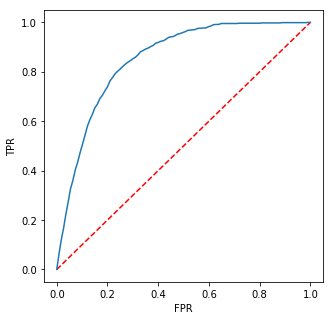

In [256]:
lrModel.summary.roc.select('FPR').collect()
lrModel.summary.roc.select('TPR').collect()
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(lrModel.summary.roc.select('FPR').collect(),
         lrModel.summary.roc.select('TPR').collect())
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [257]:
selected = lr_predictions.select("label", "prediction", "probability", "age", "work_type")
display(selected)
selected.show()

DataFrame[label: int, prediction: double, probability: vector, age: double, work_type: string]

+-----+----------+--------------------+----+-------------+
|label|prediction|         probability| age|    work_type|
+-----+----------+--------------------+----+-------------+
|    0|       1.0|[0.14140124022835...|80.0|Self-employed|
|    0|       1.0|[0.14140124022835...|80.0|Self-employed|
|    0|       1.0|[0.14140124022835...|80.0|Self-employed|
|    0|       0.0|[0.96274937754339...|21.0|      Private|
|    0|       1.0|[0.22068529946483...|79.0|      Private|
|    0|       1.0|[0.22068529946483...|79.0|      Private|
|    0|       1.0|[0.22068529946483...|79.0|      Private|
|    0|       0.0|[0.59987169569308...|56.0|      Private|
|    0|       0.0|[0.59987169569308...|56.0|      Private|
|    0|       0.0|[0.77725126248821...|36.0|     Govt_job|
|    0|       0.0|[0.77725126248821...|36.0|     Govt_job|
|    0|       0.0|[0.98676103467836...| 5.0|     children|
|    0|       0.0|[0.98676103467836...| 5.0|     children|
|    0|       1.0|[0.45989274715396...|68.0|      Privat

In [258]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
evaluator.evaluate(lr_predictions)

0.8512985286423457

In [259]:
evaluator.getMetricName()

'areaUnderROC'

In [260]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5, 2.0])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [1, 5, 10])
             .build())
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)
cvModel = cv.fit(train_data)

In [261]:
lr_cv_predictions = cvModel.transform(val_data)
evaluator.evaluate(lr_cv_predictions)

0.8518813889314089

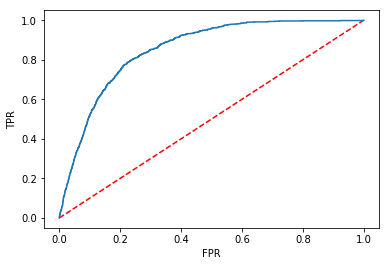

In [262]:
preds = lr_cv_predictions.select('label','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))
points = CurveMetrics(preds).get_curve('roc')
plt.figure()
x_val = [x[0] for x in points]
y_val = [x[1] for x in points]
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(x_val, y_val)

In [263]:
test_lr_pred=lrModel.transform(testSet)
test_selected_lr=test_lr_pred.select("id", "prediction", "probability", "age", "work_type")
test_selected_lr.limit(5).toPandas()

,id,prediction,probability,age,work_type
0,36306,1.0,"[0.18402774654395102, 0.815972253456049]",80.0,Private
1,61829,1.0,"[0.13723641972999617, 0.8627635802700038]",74.0,Self-employed
2,14152,0.0,"[0.9774277092977044, 0.022572290702295668]",14.0,children
3,12997,0.0,"[0.9230748229648369, 0.07692517703516322]",28.0,Private
4,40801,0.0,"[0.5435646079937767, 0.4564353920062232]",63.0,Govt_job


In [264]:
project.save_data(file_name ="LogisticRegression.csv",data =test_selected_lr.toPandas().to_csv(index=False),overwrite=True)

{'file_name': 'LogisticRegression.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'bdppproject-donotdelete-pr-bibcnvcar6fhub',
 'asset_id': '36017ee5-3158-43da-9eb9-c765d9e84d15'}

# Decision Tree Classifier

In [265]:
from pyspark.ml.classification import DecisionTreeClassifier
dtc = DecisionTreeClassifier(featuresCol = "features", labelCol = "label", maxDepth=10, maxBins=15)
dtModel = dtc.fit(train_data)

In [266]:
dtc_predictions = dtModel.transform(val_data)

In [267]:
dtc_predictions.select("prediction","probability", "label", "features").show(5)

+----------+--------------------+-----+--------------------+
|prediction|         probability|label|            features|
+----------+--------------------+-----+--------------------+
|       1.0|[0.12899336949969...|    0|[1.0,0.0,80.0,0.0...|
|       1.0|[0.12899336949969...|    0|[1.0,0.0,80.0,0.0...|
|       1.0|[0.12899336949969...|    0|[1.0,0.0,80.0,0.0...|
|       0.0|           [1.0,0.0]|    0|(11,[0,2,5,6,7,8]...|
|       1.0|[0.27153128346336...|    0|(11,[0,2,5,6,7,9]...|
+----------+--------------------+-----+--------------------+
only showing top 5 rows



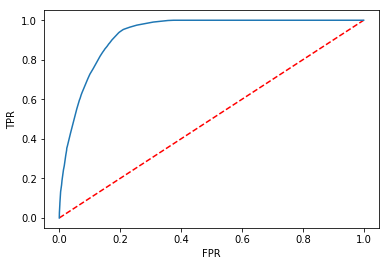

In [268]:
import matplotlib.pyplot as plt
preds = dtc_predictions.select('label','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))
points = CurveMetrics(preds).get_curve('roc')
plt.figure()
x_val = [x[0] for x in points]
y_val = [x[1] for x in points]
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(x_val, y_val)

In [269]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator=BinaryClassificationEvaluator()
print("Test Area Under ROC:"+str(evaluator.evaluate(dtc_predictions,{evaluator.metricName:"areaUnderROC"})))
evaluator.getMetricName()


Test Area Under ROC:0.8526240336715184


'areaUnderROC'

In [270]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(dtc.maxDepth, [1, 2, 6, 10])
             .addGrid(dtc.maxBins, [20, 40, 80])
             .build())

In [271]:
cv = CrossValidator(estimator=dtc, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)
cvModel = cv.fit(train_data)
dtc_cv_predictions = cvModel.transform(val_data)
print("Test Area Under ROC after cross Validation:"+str(evaluator.evaluate(dtc_cv_predictions,{evaluator.metricName:"areaUnderROC"})))

Test Area Under ROC after cross Validation:0.880577435641433


In [272]:
dtc_selected = dtc_cv_predictions.select("label", "prediction", "probability", "age", "work_type")
display(dtc_selected)
dtc_selected.show()

DataFrame[label: int, prediction: double, probability: vector, age: double, work_type: string]

+-----+----------+--------------------+----+-------------+
|label|prediction|         probability| age|    work_type|
+-----+----------+--------------------+----+-------------+
|    0|       1.0|[0.11670336583831...|80.0|Self-employed|
|    0|       1.0|[0.11670336583831...|80.0|Self-employed|
|    0|       1.0|[0.11670336583831...|80.0|Self-employed|
|    0|       0.0|           [1.0,0.0]|21.0|      Private|
|    0|       1.0|[0.25400641025641...|79.0|      Private|
|    0|       1.0|[0.25400641025641...|79.0|      Private|
|    0|       1.0|[0.25400641025641...|79.0|      Private|
|    0|       0.0|           [1.0,0.0]|56.0|      Private|
|    0|       0.0|           [1.0,0.0]|56.0|      Private|
|    0|       0.0|[0.80570071258907...|36.0|     Govt_job|
|    0|       0.0|[0.80570071258907...|36.0|     Govt_job|
|    0|       0.0|           [1.0,0.0]| 5.0|     children|
|    0|       0.0|           [1.0,0.0]| 5.0|     children|
|    0|       1.0|[0.48805460750853...|68.0|      Privat

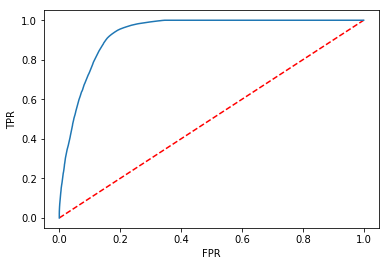

In [273]:
preds = dtc_cv_predictions.select('label','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))
points = CurveMetrics(preds).get_curve('roc')
plt.figure()
x_val = [x[0] for x in points]
y_val = [x[1] for x in points]
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(x_val, y_val)

In [274]:
test_dtc_pred=dtModel.transform(testSet)
test_selected_dtc=test_dtc_pred.select("id", "prediction", "probability", "age", "work_type")
test_selected_dtc.limit(5).toPandas()

,id,prediction,probability,age,work_type
0,36306,1.0,"[0.2715312834633624, 0.7284687165366376]",80.0,Private
1,61829,0.0,"[1.0, 0.0]",74.0,Self-employed
2,14152,0.0,"[1.0, 0.0]",14.0,children
3,12997,0.0,"[1.0, 0.0]",28.0,Private
4,40801,0.0,"[1.0, 0.0]",63.0,Govt_job


In [275]:
project.save_data(file_name ="DecisionTree.csv",data =test_selected_dtc.toPandas().to_csv(index=False),overwrite=True)

{'file_name': 'DecisionTree.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'bdppproject-donotdelete-pr-bibcnvcar6fhub',
 'asset_id': 'e0f4eb3c-8bb9-4834-9aed-6a8e58327607'}

# Random Forest Algorithm

In [276]:
from pyspark.ml.classification import RandomForestClassifier
rfc = RandomForestClassifier(labelCol="label", featuresCol="features")
rfcModel = rfc.fit(train_data)
rfc_predictions = rfcModel.transform(val_data)

In [277]:
selected = rfc_predictions.select("label", "prediction", "probability", "age", "work_type")
display(selected)

DataFrame[label: int, prediction: double, probability: vector, age: double, work_type: string]

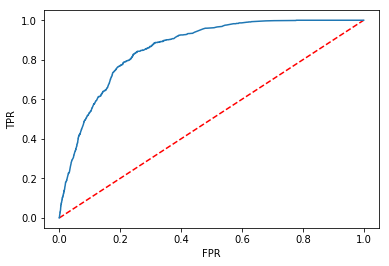

In [278]:
preds = rfc_predictions.select('label','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))
points = CurveMetrics(preds).get_curve('roc')
plt.figure()
plt.plot([0, 1], [0, 1], 'r--')
x_val = [x[0] for x in points]
y_val = [x[1] for x in points]
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(x_val, y_val)

In [279]:
evaluator = BinaryClassificationEvaluator()
evaluator.evaluate(rfc_predictions)

0.8609626576507212

In [280]:
evaluator.getMetricName()

'areaUnderROC'

In [281]:
paramGrid = (ParamGridBuilder()
             .addGrid(rfc.maxDepth, [2, 4, 6])
             .addGrid(rfc.maxBins, [20, 60])
             .addGrid(rfc.numTrees, [5, 20])
             .build())

cv = CrossValidator(estimator=rfc, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)
cvModel = cv.fit(train_data)

In [282]:
rfc_cv_predictions = cvModel.transform(val_data)
evaluator.evaluate(rfc_cv_predictions)

0.87964719582173

In [283]:
rfc_selected = rfc_cv_predictions.select("label", "prediction", "probability", "age", "work_type")
display(rfc_selected)
rfc_selected.show()

DataFrame[label: int, prediction: double, probability: vector, age: double, work_type: string]

+-----+----------+--------------------+----+-------------+
|label|prediction|         probability| age|    work_type|
+-----+----------+--------------------+----+-------------+
|    0|       1.0|[0.20308343964774...|80.0|Self-employed|
|    0|       1.0|[0.20308343964774...|80.0|Self-employed|
|    0|       1.0|[0.20308343964774...|80.0|Self-employed|
|    0|       0.0|[0.81099159996492...|21.0|      Private|
|    0|       1.0|[0.31770536437910...|79.0|      Private|
|    0|       1.0|[0.31770536437910...|79.0|      Private|
|    0|       1.0|[0.31770536437910...|79.0|      Private|
|    0|       0.0|[0.71753676969433...|56.0|      Private|
|    0|       0.0|[0.71753676969433...|56.0|      Private|
|    0|       0.0|[0.80121218838892...|36.0|     Govt_job|
|    0|       0.0|[0.80121218838892...|36.0|     Govt_job|
|    0|       0.0|[0.91069463870083...| 5.0|     children|
|    0|       0.0|[0.91069463870083...| 5.0|     children|
|    0|       1.0|[0.37822828439667...|68.0|      Privat

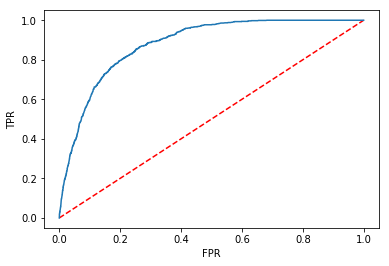

In [284]:
preds = rfc_cv_predictions.select('label','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))
points = CurveMetrics(preds).get_curve('roc')
plt.figure()
x_val = [x[0] for x in points]
y_val = [x[1] for x in points]
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(x_val, y_val)

In [285]:
test_rfc_pred=rfcModel.transform(testSet)
test_selected_rf=test_rfc_pred.select("id", "prediction", "probability", "age", "work_type")
test_selected_rf.limit(5).toPandas()

,id,prediction,probability,age,work_type
0,36306,1.0,"[0.2824020134513453, 0.7175979865486547]",80.0,Private
1,61829,1.0,"[0.15440257265131482, 0.8455974273486853]",74.0,Self-employed
2,14152,0.0,"[0.8761151270827469, 0.12388487291725307]",14.0,children
3,12997,0.0,"[0.8693973465261078, 0.1306026534738923]",28.0,Private
4,40801,1.0,"[0.49662600495607956, 0.5033739950439204]",63.0,Govt_job


In [286]:
project.save_data(file_name ="RandomForest.csv",data =test_selected_rf.toPandas().to_csv(index=False),overwrite=True)

{'file_name': 'RandomForest.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'bdppproject-donotdelete-pr-bibcnvcar6fhub',
 'asset_id': '83383bed-b6c6-4245-ba0b-c2519e997ca3'}